In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics                           
from sklearn import tree
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt



In [2]:
st_df = pd.read_csv("./data.csv", sep = ";")

In [3]:
st_df.shape

(4424, 37)

In [4]:
st_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
st_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
st_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:
"I will use label encoding for the target variable"
le_df = st_df
le_df["Target"] = le_df["Target"].map({"Dropout": 0 , "Enrolled" : 1 , "Graduate" : 2})

In [9]:
le_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


I'm going to carry out an outlier analysis now. 

C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


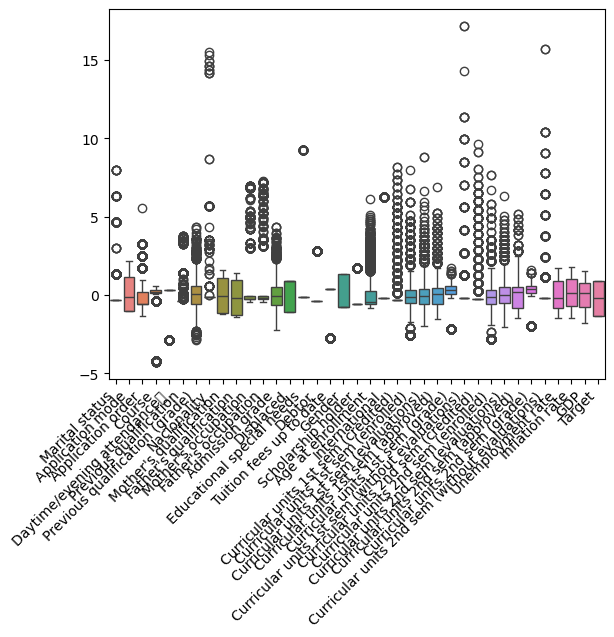

In [11]:
# I scale the data so it's easier to compare the outliers
b = le_df
scaler = StandardScaler()
scaler.fit(b)
a = scaler.transform(b)
a = pd.DataFrame(a, columns = b.columns)
plt.xticks(rotation=45, ha='right')
sns.boxplot(data=a)
plt.show()

For the data, the number of rows is 4424 and after deleting the outliers is 4148


C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


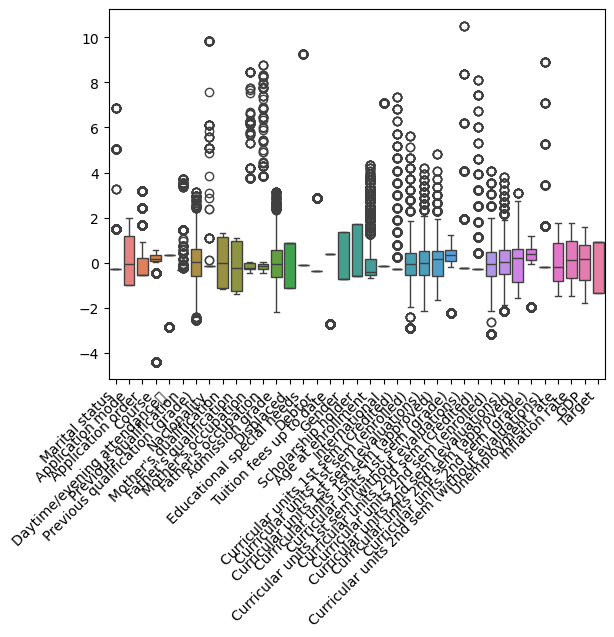

In [12]:
#Since there are so many outliers, loss of information is possible. I'll delete only the most extreme outliers
X = le_df
Q1 = X.quantile(0.005) #Not very rigid, I take most values.
Q3 = X.quantile(0.995)
X_noout = X[((X >= Q1) &  (X <= Q3)).all(axis=1)]
print ("For the data, the number of rows is", X.shape[0] , "and after deleting the outliers is", X_noout.shape[0], sep = " ")

le_df = X_noout    

 
# I scale the data again so it's easier to compare the outliers
b = le_df
scaler = StandardScaler()
scaler.fit(b)
a = scaler.transform(b)
a = pd.DataFrame(a, columns = b.columns)
plt.xticks(rotation=45, ha='right')
sns.boxplot(data=a)
plt.show()

Target
2    2076
0    1324
1     748
Name: count, dtype: int64


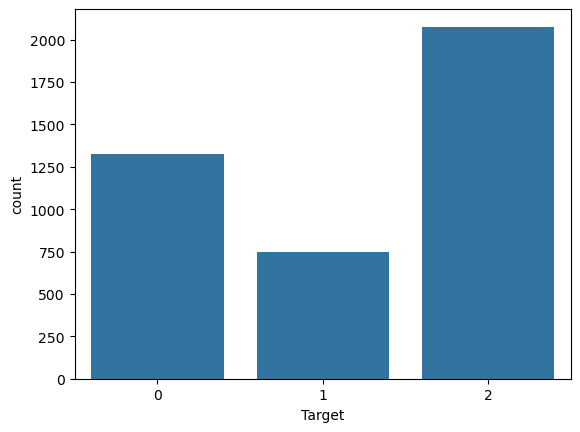

In [13]:
#I count the amounts to see if the data is balanced
print(le_df.Target.value_counts())
sns.countplot(x = le_df["Target"] , data=le_df)
plt.show()

The datasets are not balanced. Graduate is the majority class and enrolled is the minority class.
I'm going to proceed calculating the correlation matrix

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\VICTUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


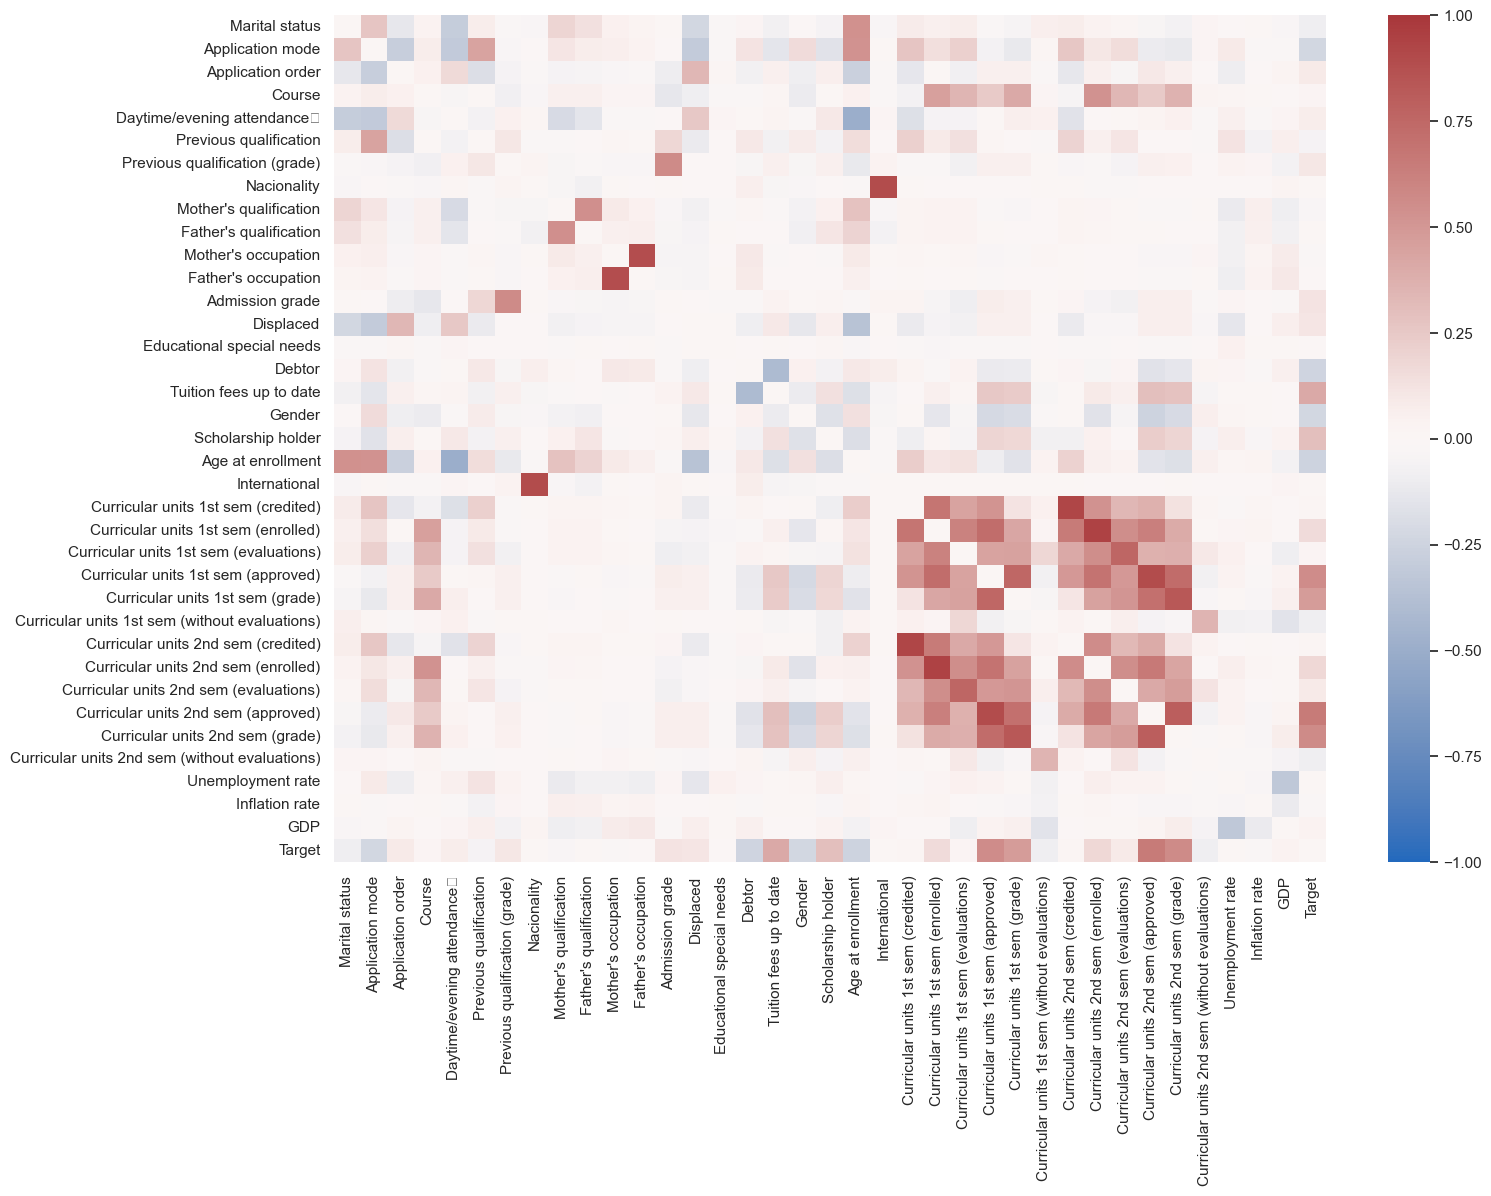

In [15]:
cor_mxs = []
cor_matrix = le_df.corr()
for col in cor_matrix:
    cor_matrix.loc[col,col]=0 # I make the values in the diagonal 0 
cor_mxs.append (cor_matrix)
sns.set(rc={'figure.figsize':(16, 11)})
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap ="vlag", annot=False) 
plt.show()

In [16]:
#"We have made the diagonal values 0 and will now check what values are more correlated than 0.85 ( or less than -0.85)"
#In these lines we check what columns have a correlation higher than 0.85 
for cor_matrix in cor_mxs:
    high_cor = pd.DataFrame([("-".join(sorted([row, col])), cor_matrix.loc[row, col])
                             for row in cor_matrix.index 
                             for col in cor_matrix.columns 
                             if cor_matrix.loc[row, col] > 0.85], 
                            columns=['Columns', 'Correlation']).drop_duplicates().reset_index(drop=True)
    high_cor[["Column 1", "Column 2"]] = high_cor["Columns"].str.split("-", n=1, expand= True)
    high_cor.drop("Columns", axis = 'columns')
    display(high_cor)
    print ( "\n")

,Columns,Correlation,Column 1,Column 2
0,International-Nacionality,0.892888,International,Nacionality
1,Father's occupation-Mother's occupation,0.886434,Father's occupation,Mother's occupation
2,Curricular units 1st sem (credited)-Curricular...,0.922148,Curricular units 1st sem (credited),Curricular units 2nd sem (credited)
3,Curricular units 1st sem (enrolled)-Curricular...,0.938134,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)
4,Curricular units 1st sem (approved)-Curricular...,0.894341,Curricular units 1st sem (approved),Curricular units 2nd sem (approved)


These columns have a very high correlation in all three instances, which might indicate that some of these features are redundant.

I will now calculate the GINI index to further confirm this and see if the model can be simplified. 
Since the data is imbalanced, I will use SMOTE and NearMiss together.

The reason for using both is that the imbalance is very big between the three. Resampling the minority class will result in inaccurate data, while undersampling the majority will result in the loss of data. To mitigate this, I'm using both of the techniques to reach the one in the middle.

Since I'm using these methods I will rescale the data now. 

In [18]:
X = le_df.drop("Target", axis =1)
y = le_df["Target"] 
# Since the classes are imbalanced I use the stratify parameter so the proportions are followed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42, stratify = y) 
train1 = pd.concat([X_train,y_train], axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.15,  random_state = 42, stratify = y)
train2 = pd.concat([X_train2,y_train2], axis = 1 )
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25,  random_state = 42, stratify = y)
train3 = pd.concat([X_train3,y_train3], axis = 1)
training_data = [train1, train2, train3]
test1 = pd.concat([X_test,y_test], axis = 1)
test2 = pd.concat([X_test2,y_test2], axis = 1)
test3 = pd.concat([X_test3,y_test3], axis = 1)
test_data = [test1, test2, test3]
test2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2788,1,39,1,9670,1,1,148.0,1,19,19,...,0,6,9,0,0.000000,0,10.8,1.4,1.74,0
970,1,43,1,9670,1,1,130.0,1,34,34,...,0,5,5,4,14.750000,0,7.6,2.6,0.32,2
3954,1,1,1,9773,1,1,125.0,1,3,2,...,0,6,14,1,10.000000,0,9.4,-0.8,-3.12,0
1981,1,17,1,9238,1,1,116.0,1,19,19,...,0,6,9,6,11.833333,0,8.9,1.4,3.51,2
732,1,1,1,9254,1,1,132.0,1,1,19,...,0,6,8,5,11.600000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,1,17,1,171,1,1,125.0,1,1,1,...,0,0,0,0,0.000000,0,15.5,2.8,-4.06,1
4186,1,17,2,9085,1,1,138.0,1,37,37,...,0,5,10,4,11.750000,1,9.4,-0.8,-3.12,1
4326,1,39,1,8014,0,39,110.0,1,19,37,...,0,6,7,5,13.200000,0,16.2,0.3,-0.92,0
3355,2,39,2,9003,1,19,133.1,1,38,19,...,0,7,9,0,0.000000,0,15.5,2.8,-4.06,0


In [19]:
tr_sampled = []
for train in training_data: 
    X_train = pd.DataFrame(train.drop("Target", axis = 1))
    y_train = pd.DataFrame(train["Target"])
    scaler = RobustScaler() #Because of the great quantity of outliers we have left. I'll use the robust outlier.
    X_train_scaled = scaler.fit_transform(X_train)
    
    # According to previous counts, 0 is the medium, 1 is the minimum and 2 is the maximum:
    medium_value = y_train.value_counts()[0] 
    max_value = y_train.value_counts()[2] 
    smt = SMOTE(sampling_strategy ={ 0 : medium_value , 1: medium_value, 2: max_value} )
    nr = NearMiss(sampling_strategy = "majority") 
    X_train_scaled, y_train = smt.fit_resample(X_train_scaled, y_train)  # Resample with SMOTE of the minority class
    X_train_scaled, y_train = nr.fit_resample(X_train_scaled, y_train)   # Resample with NearMiss of the majority class
    print (y_train.value_counts())
    tr_sampled.append([pd.DataFrame(data = X_train_scaled, columns = X_train.columns), 
                       pd.DataFrame(data = y_train, columns = y_train.columns)])

    



Target
0         1192
1         1192
2         1192
Name: count, dtype: int64
Target
0         1125
1         1125
2         1125
Name: count, dtype: int64
Target
0         993
1         993
2         993
Name: count, dtype: int64


In [20]:
count = 0

for tr_data in tr_sampled:
    y_test = test_data[count]["Target"]
    columns_x = test_data[count].drop("Target", axis = 1 ).columns
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    rf.fit(tr_data[0], tr_data[1])
    X_test = test_data[count].drop("Target", axis = 1)
    y_pred = rf.predict(X_test)
    print(classification_report(y_test, y_pred))
    importance = dict(zip(columns_x, rf.feature_importances_)) # Getting the importance indexes
    #I'm going to discard the features where the gini index is less than 0.03
    feat_drop = []
    for feat, feat_imp in importance.items():
        if feat_imp < 0.03:
            feat_drop.append(feat)
    print(" ".join(feat_drop))
    print(len(feat_drop))
    training_data[count] = training_data[count].drop(feat_drop, axis = 1) #We dropped the columns in the data after deleting the outliers.
    test_data[count] = test_data[count].drop(feat_drop, axis = 1)
    count += 1

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

              precision    recall  f1-score   support

           0       0.30      0.89      0.45       132
           1       0.14      0.04      0.06        75
           2       0.00      0.00      0.00       208

    accuracy                           0.29       415
   macro avg       0.15      0.31      0.17       415
weighted avg       0.12      0.29      0.15       415

Marital status Application order Daytime/evening attendance	 Previous qualification Nacionality Mother's qualification Father's qualification Mother's occupation Father's occupation Displaced Educational special needs Debtor Gender Scholarship holder International Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (without evaluations) Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled) Curricular units 2nd sem (without evaluations) Unemployment rate Inflation rate GDP
24


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-pa

              precision    recall  f1-score   support

           0       0.36      0.85      0.51       199
           1       0.21      0.29      0.25       112
           2       0.00      0.00      0.00       312

    accuracy                           0.32       623
   macro avg       0.19      0.38      0.25       623
weighted avg       0.15      0.32      0.21       623

Marital status Application order Daytime/evening attendance	 Previous qualification Nacionality Mother's qualification Father's qualification Mother's occupation Father's occupation Displaced Educational special needs Debtor Gender Scholarship holder International Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (without evaluations) Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled) Curricular units 2nd sem (without evaluations) Unemployment rate Inflation rate GDP
24
              precision    recall  f1-score   support

           0       0.

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now that the dataset is defined I'm going to do a grid search for the classification algorithms

In [22]:
#Models that I'm going to use
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

In [48]:
#Parameters
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [25, 50, 100],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']     
    },
    "Support Vector Machine": {
        "C": [0.1, 5],
        "kernel": ['rbf'],
        "gamma": ['scale', 'auto']
    },

    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50), (50,100)],    
        "activation": [ 'relu', 'logistic', 'tanh'],
        "solver": ['adam', 'sgd'],
        "learning_rate": ['constant', 'adaptive']     
    }
}

For each different test / training set a partition number is given from 0 to 2. 

There are three cells with the grid search done for each case.

In [52]:
for partition in range(3):
    print ("\n\nPartition number ", partition)
    X_train = training_data[partition].drop("Target", axis = 1)
    y_train = training_data[partition]["Target"]
    X_test = test_data[partition].drop("Target", axis = 1)
    y_test = test_data[partition]["Target"]
    results = []
    accuracies = []
    scaler = RobustScaler() #Because of the great quantity of outliers we have left. I'll use the robust outlier.
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    medium_value = y_train.value_counts()[0] 
    max_value = y_train.value_counts()[2] 
    smt = SMOTE(sampling_strategy ={ 0 : medium_value , 1: medium_value, 2: max_value} )
    nr = NearMiss(sampling_strategy = "majority") 
    X_train, y_train = smt.fit_resample(X_train, y_train)  # Resample with SMOTE of the minority class
    X_train, y_train = nr.fit_resample(X_train, y_train)   # Resample with NearMiss of the majority class
    for name, model in classifiers.items():
        print(f"Running GridSearchCV for {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
        grid_search.fit(X_train, y_train)
        
        
        best_model = grid_search.best_estimator_
        
        # Predict with the best model
        y_pred = best_model.predict(X_test)
        y_tr_pred = best_model.predict(X_train)
        # Calculate metrics test
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        
        # Calculate metrics training
        tr_accuracy = accuracy_score(y_train, y_tr_pred )
        # See over or underfitting
        if tr_accuracy - accuracy > 0.1:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Overfitted"])   
        elif tr_accuracy < 0.5 and accuracy < 0.5:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Underfitted"])
        else:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Good fit"])
        accuracies.append([name,accuracy, tr_accuracy])   
        
    results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best parameters", "Model fit"])
    acc_df = pd.DataFrame(accuracies, columns = ["Model","Test Accuracy", "Training Accuracy"])
    
    display(results_df)
    display(acc_df)



Partition number  0
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.679518,0.739005,0.679518,0.697717,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.631325,0.687720,0.631325,0.648922,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
2,Random Forest,0.648193,0.709406,0.648193,0.664506,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.631325,0.702030,0.631325,0.653859,"{'algorithm': 'auto', 'n_neighbors': 9}",Overfitted
4,Support Vector Machine,0.662651,0.707010,0.662651,0.674386,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.662651,0.702532,0.662651,0.675544,"{'activation': 'relu', 'hidden_layer_sizes': (...",Overfitted


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.679518,0.720078
1,Decision Tree,0.631325,0.843960
2,Random Forest,0.648193,0.997483
3,k-Nearest Neighbors,0.631325,0.790828
4,Support Vector Machine,0.662651,0.789430
5,Neural Network,0.662651,0.801454




Partition number  1
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.672552,0.739048,0.672552,0.694316,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.642055,0.688094,0.642055,0.656639,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
2,Random Forest,0.674157,0.716700,0.674157,0.687840,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.616372,0.671855,0.616372,0.633826,"{'algorithm': 'auto', 'n_neighbors': 5}",Overfitted
4,Support Vector Machine,0.642055,0.697663,0.642055,0.656750,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.643660,0.685366,0.643660,0.653926,"{'activation': 'relu', 'hidden_layer_sizes': (...",Overfitted


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.672552,0.724148
1,Decision Tree,0.642055,0.864593
2,Random Forest,0.674157,0.997333
3,k-Nearest Neighbors,0.616372,0.823704
4,Support Vector Machine,0.642055,0.789037
5,Neural Network,0.643660,0.881185




Partition number  2
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.675988,0.739131,0.675988,0.694389,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.684667,0.723014,0.684667,0.697724,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",Good fit
2,Random Forest,0.671167,0.715609,0.671167,0.685629,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.607522,0.670391,0.607522,0.624465,"{'algorithm': 'auto', 'n_neighbors': 3}",Overfitted
4,Support Vector Machine,0.647059,0.707696,0.647059,0.662549,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.637416,0.693921,0.637416,0.653430,"{'activation': 'relu', 'hidden_layer_sizes': (...",Overfitted


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.675988,0.720040
1,Decision Tree,0.684667,0.757301
2,Random Forest,0.671167,0.998657
3,k-Nearest Neighbors,0.607522,0.864048
4,Support Vector Machine,0.647059,0.795905
5,Neural Network,0.637416,0.885868


In [50]:
for partition in range(3):
    print ("\n\nPartition number ", partition)
    X_train = training_data[partition].drop("Target", axis = 1)
    y_train = training_data[partition]["Target"]
    X_test = test_data[partition].drop("Target", axis = 1)
    y_test = test_data[partition]["Target"]
    results = []
    accuracies = []
    medium_value = y_train.value_counts()[0] 
    max_value = y_train.value_counts()[2] 
    smt = SMOTE(sampling_strategy ={ 0 : medium_value , 1: medium_value, 2: max_value} )
    nr = NearMiss(sampling_strategy = "majority") 
    X_train, y_train = smt.fit_resample(X_train, y_train)  # Resample with SMOTE of the minority class
    X_train, y_train = nr.fit_resample(X_train, y_train)   # Resample with NearMiss of the majority class
    for name, model in classifiers.items():
        print(f"Running GridSearchCV for {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
        grid_search.fit(X_train, y_train)
        
        
        best_model = grid_search.best_estimator_
        
        # Predict with the best model
        y_pred = best_model.predict(X_test)
        y_tr_pred = best_model.predict(X_train)
        # Calculate metrics test
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        
        # Calculate metrics training
        tr_accuracy = accuracy_score(y_train, y_tr_pred )
        # See over or underfitting
        if tr_accuracy - accuracy > 0.1:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Overfitted"])   
        elif tr_accuracy < 0.5 and accuracy < 0.5:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Underfitted"])
        else:
            results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Good fit"])
        accuracies.append([name,accuracy, tr_accuracy])   
        
    results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best parameters", "Model fit"])
    acc_df = pd.DataFrame(accuracies, columns = ["Model","Test Accuracy", "Training Accuracy"])
    
    display(results_df)
    display(acc_df)



Partition number  0
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.691566,0.713822,0.691566,0.699847,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",Good fit
1,Decision Tree,0.660241,0.689362,0.660241,0.669854,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",Overfitted
2,Random Forest,0.696386,0.718959,0.696386,0.705047,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.573494,0.663810,0.573494,0.603470,"{'algorithm': 'auto', 'n_neighbors': 7}",Overfitted
4,Support Vector Machine,0.522892,0.606592,0.522892,0.505224,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.616867,0.574268,0.616867,0.570610,"{'activation': 'relu', 'hidden_layer_sizes': (...",Good fit


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.691566,0.685962
1,Decision Tree,0.660241,0.840045
2,Random Forest,0.696386,0.996085
3,k-Nearest Neighbors,0.573494,0.746644
4,Support Vector Machine,0.522892,0.997483
5,Neural Network,0.616867,0.546700




Partition number  1
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.678973,0.706780,0.678973,0.689602,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",Good fit
1,Decision Tree,0.693419,0.740324,0.693419,0.707292,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",Good fit
2,Random Forest,0.693419,0.714577,0.693419,0.701240,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",Overfitted
3,k-Nearest Neighbors,0.550562,0.624026,0.550562,0.570939,"{'algorithm': 'auto', 'n_neighbors': 3}",Overfitted
4,Support Vector Machine,0.512039,0.603710,0.512039,0.492189,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.714286,0.683314,0.714286,0.688883,"{'activation': 'logistic', 'hidden_layer_sizes...",Good fit


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.678973,0.682963
1,Decision Tree,0.693419,0.741037
2,Random Forest,0.693419,1.000000
3,k-Nearest Neighbors,0.550562,0.828444
4,Support Vector Machine,0.512039,0.996741
5,Neural Network,0.714286,0.618074




Partition number  2
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.684667,0.707903,0.684667,0.693537,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",Good fit
1,Decision Tree,0.681774,0.731328,0.681774,0.697310,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",Good fit
2,Random Forest,0.693346,0.729344,0.693346,0.704932,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.526519,0.588329,0.526519,0.544324,"{'algorithm': 'auto', 'n_neighbors': 3}",Overfitted
4,Support Vector Machine,0.497589,0.601452,0.497589,0.475788,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.188042,0.148575,0.188042,0.081947,"{'activation': 'logistic', 'hidden_layer_sizes...",Overfitted


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.684667,0.689493
1,Decision Tree,0.681774,0.748909
2,Random Forest,0.693346,0.977174
3,k-Nearest Neighbors,0.526519,0.830480
4,Support Vector Machine,0.497589,0.998322
5,Neural Network,0.188042,0.340383


In [66]:
partition = 1
X_train = training_data[partition].drop("Target", axis = 1)
y_train = training_data[partition]["Target"]
X_test = test_data[partition].drop("Target", axis = 1)
y_test = test_data[partition]["Target"]
results = []
accuracies = []
medium_value = y_train.value_counts()[0] 
max_value = y_train.value_counts()[2] 
smt = SMOTE(sampling_strategy ={ 0 : medium_value , 1: medium_value, 2: max_value} )
nr = NearMiss(sampling_strategy = "majority") 
X_train, y_train = smt.fit_resample(X_train, y_train)  # Resample with SMOTE of the minority class
X_train, y_train = nr.fit_resample(X_train, y_train)   # Resample with NearMiss of the majority class

name = "Decision Tree"
model = classifiers[name]
print(f"Running GridSearchCV for {name}...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)
columns_x = X_train.columns
importance = pd.DataFrame.from_dict(data = dict(zip(columns_x, best_model.feature_importances_)), orient = "index") # Getting the importance indexes
print(importance)

Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
                                               0
Application mode                        0.004220
Course                                  0.096988
Previous qualification (grade)          0.019769
Admission grade                         0.014515
Tuition fees up to date                 0.062277
Age at enrollment                       0.048078
Curricular units 1st sem (evaluations)  0.077977
Curricular units 1st sem (approved)     0.019956
Curricular units 1st sem (grade)        0.000000
Curricular units 2nd sem (evaluations)  0.009580
Curricular units 2nd sem (approved)     0.440309
Curricular units 2nd sem (grade)        0.206330
